# Analyse des données brutes de capteurs météo

Ce notebook guide étape par étape le chargement, la visualisation et la préparation de vos données issues de capteurs météo pour une analyse ou un traitement ultérieur.

## 1. Charger les bibliothèques nécessaires
Nous allons utiliser pandas, numpy, matplotlib et seaborn.

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Affichage des graphiques dans le notebook
%matplotlib inline

## 2. Charger les données brutes depuis un fichier
Nous allons lire le fichier CSV contenant les données des capteurs météo.

In [196]:
# Remplacer le nom du fichier si besoin
fichier = 'MultisensorData.csv'
df = pd.read_csv(fichier)
df.head()

,entity_id,state,last_changed
0,sensor.multisensor_raw_air_quality,322.999,2025-09-11T12:00:00.000Z
1,sensor.multisensor_raw_air_quality,323.8163,2025-09-11T12:02:01.074Z
2,sensor.multisensor_raw_air_quality,323.6122,2025-09-11T12:07:01.080Z
3,sensor.multisensor_raw_air_quality,322.5888,2025-09-11T12:12:01.086Z
4,sensor.multisensor_raw_air_quality,322.3827,2025-09-11T12:17:01.109Z


## 3. Afficher un aperçu des données
Regardons les premières lignes, les infos générales et les statistiques descriptives.

In [197]:
# Aperçu des premières lignes
df.head()

,entity_id,state,last_changed
0,sensor.multisensor_raw_air_quality,322.999,2025-09-11T12:00:00.000Z
1,sensor.multisensor_raw_air_quality,323.8163,2025-09-11T12:02:01.074Z
2,sensor.multisensor_raw_air_quality,323.6122,2025-09-11T12:07:01.080Z
3,sensor.multisensor_raw_air_quality,322.5888,2025-09-11T12:12:01.086Z
4,sensor.multisensor_raw_air_quality,322.3827,2025-09-11T12:17:01.109Z


In [198]:
# Transformation du DataFrame en format long pour les tracés (grandeurs physiques uniquement)
# On exclut 'last_changed', 'entity_id' et 'state' des grandeurs physiques
cols_phys = [col for col in df.columns if col not in ['last_changed', 'entity_id', 'state']]
df_phys_all = df.melt(id_vars=['last_changed', 'entity_id'], value_vars=cols_phys, var_name='label', value_name='value')
df_phys_all['value'] = pd.to_numeric(df_phys_all['value'], errors='coerce')
df_phys_all = df_phys_all.dropna(subset=['value'])
df_phys_all.head()

,last_changed,entity_id,label,value


In [199]:
# Diagnostic du DataFrame long pour les tracés
print('Colonnes du DataFrame original :', df.columns.tolist())
print('Aperçu de df_phys_all :')
print(df_phys_all.head())
print('Labels uniques (grandeurs physiques) :', df_phys_all['label'].unique())
print('Nombre de lignes dans df_phys_all :', len(df_phys_all))

Colonnes du DataFrame original : ['entity_id', 'state', 'last_changed']
Aperçu de df_phys_all :
Empty DataFrame
Columns: [last_changed, entity_id, label, value]
Index: []
Labels uniques (grandeurs physiques) : []
Nombre de lignes dans df_phys_all : 0


In [200]:
# Infos générales sur le DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   entity_id     9756 non-null   object
 1   state         9751 non-null   object
 2   last_changed  9756 non-null   object
dtypes: object(3)
memory usage: 228.8+ KB


In [201]:
# Statistiques descriptives
df.describe()

,entity_id,state,last_changed
count,9756,9751,9756
unique,5,6165,7316
top,sensor.multisensor_raw_humidity,16.66667,2025-09-11T12:00:00.000Z
freq,2289,42,5


## 4. Nettoyer et préparer les données
Supprimer ou corriger les valeurs aberrantes, renommer les colonnes si besoin, convertir les dates, etc.

## 5. Visualisation séparée des grandeurs physiques
Chaque grandeur physique est affichée sur un graphique distinct pour une meilleure lisibilité.

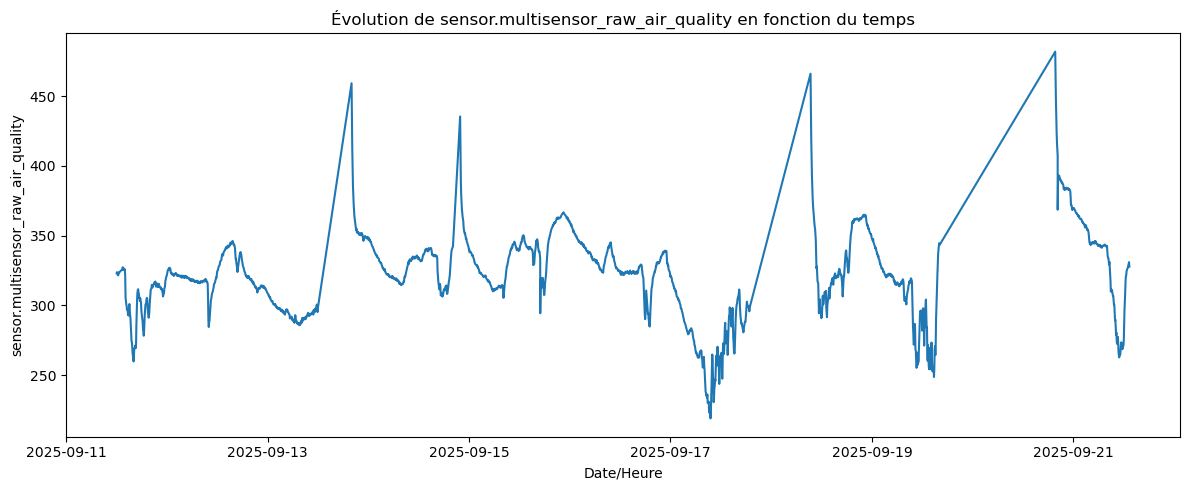

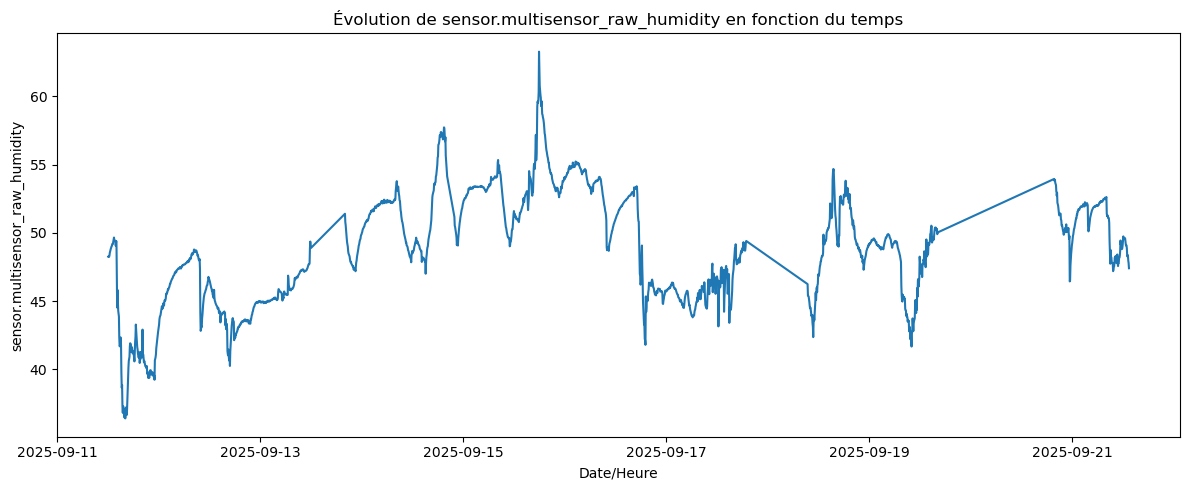

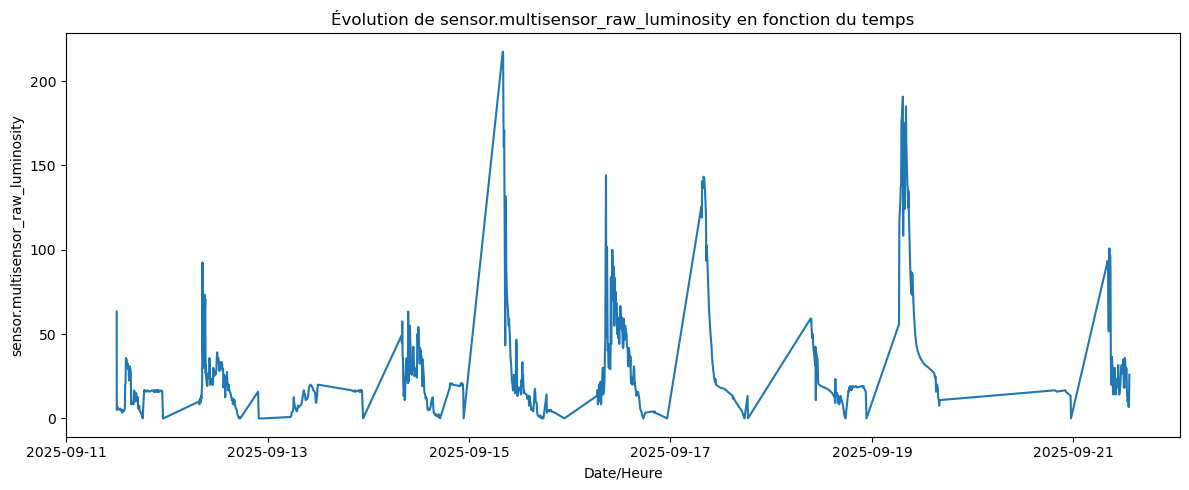

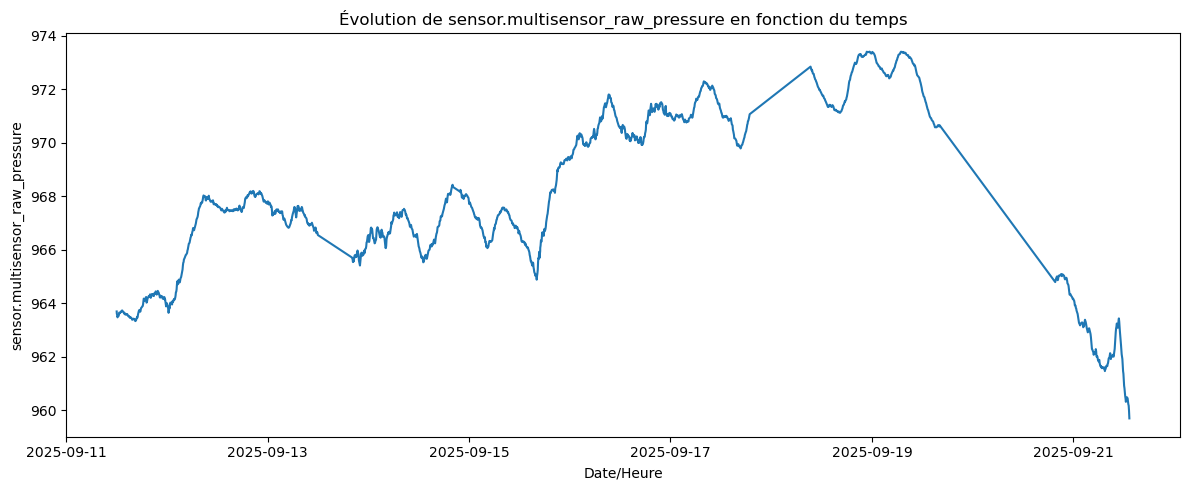

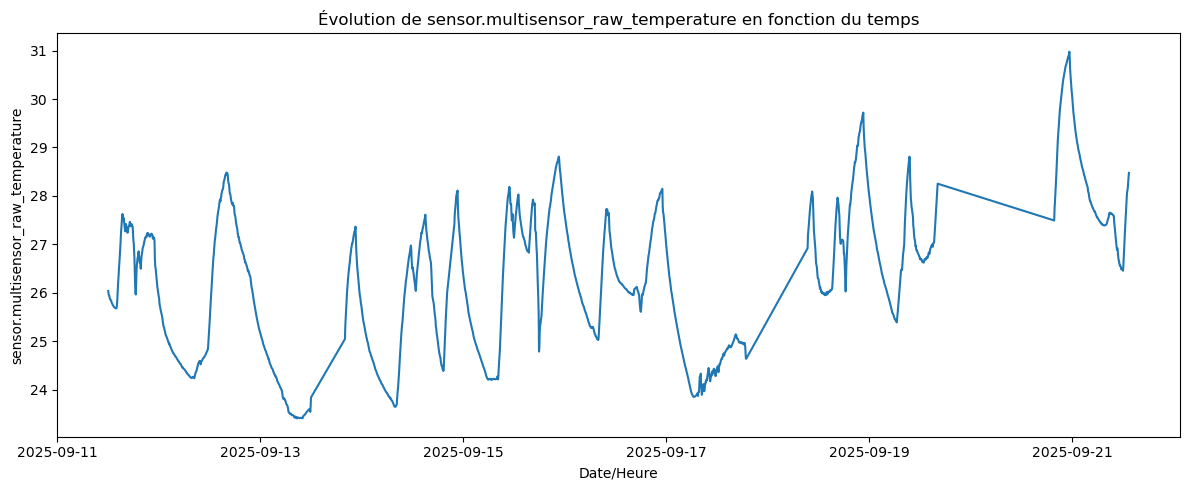

In [202]:
# --- Partie plot : un graphe par grandeur physique (valeurs brutes, nettoyage inclus) ---
df['last_changed'] = pd.to_datetime(df['last_changed'])
df['state'] = pd.to_numeric(df['state'], errors='coerce')

df_clean = df.dropna(subset=['last_changed', 'state', 'entity_id'])

for entity in df_clean['entity_id'].unique():
    df_plot = df_clean[df_clean['entity_id'] == entity].sort_values('last_changed')
    plt.figure(figsize=(12, 5))
    sns.lineplot(x='last_changed', y='state', data=df_plot)
    plt.title(f"Évolution de {entity} en fonction du temps")
    plt.xlabel("Date/Heure")
    plt.ylabel(entity)
    plt.tight_layout()
    plt.show()

## 7. Moyenne glissante sur chaque grandeur physique et Visualisation interactive avec Plotly
Les graphiques ci-dessous sont interactifs : zoom, déplacement, affichage des valeurs au survol, etc.

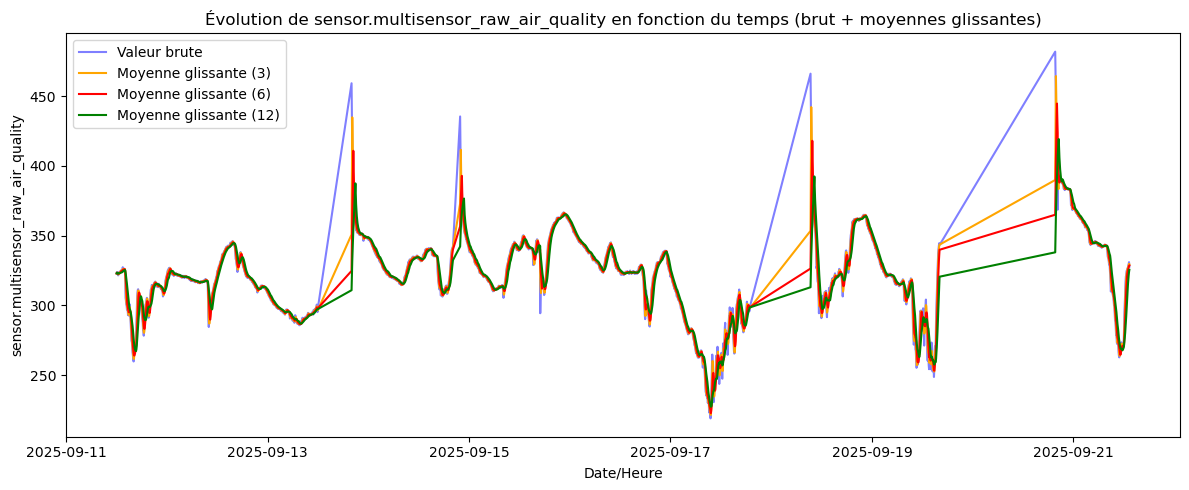

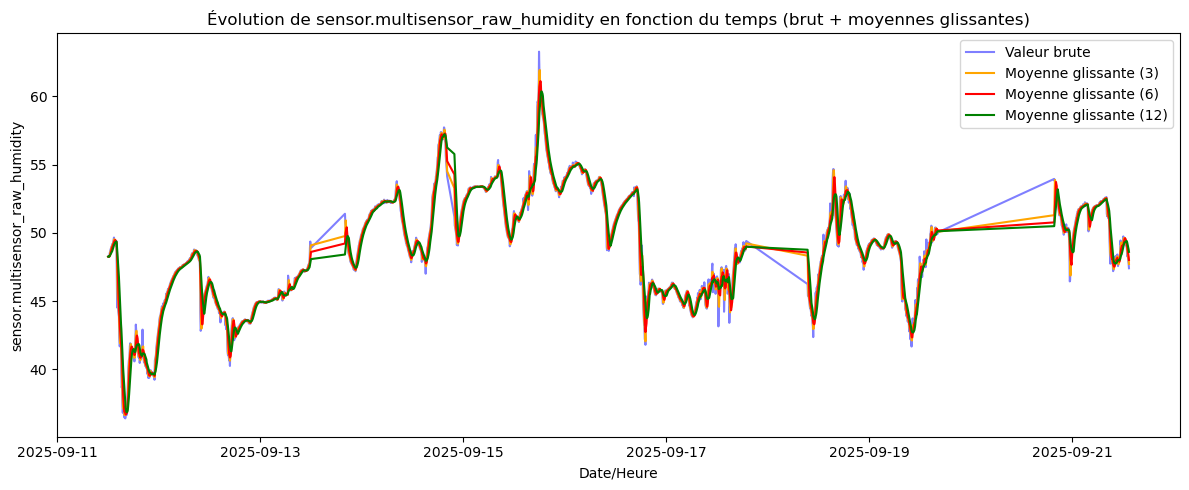

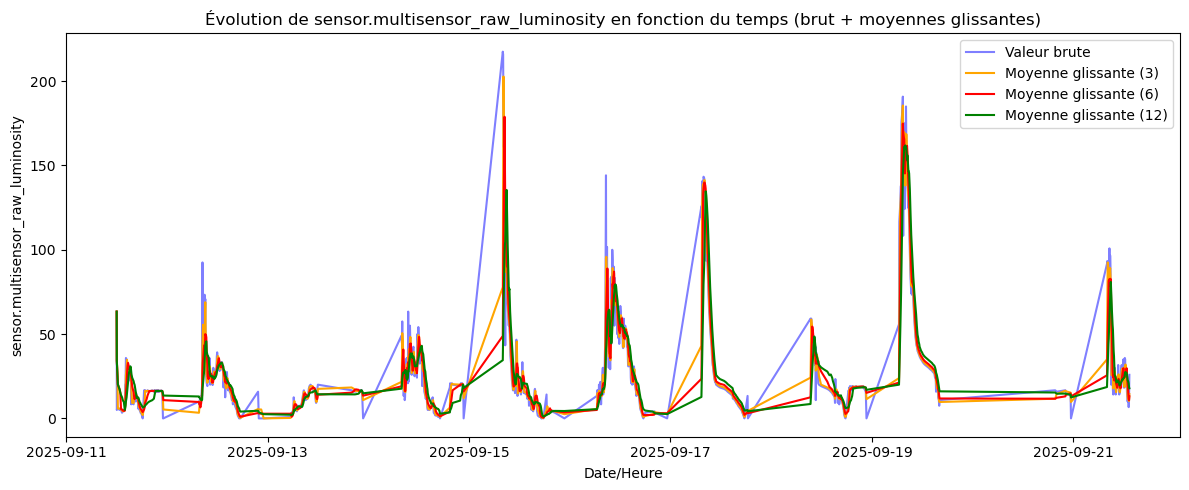

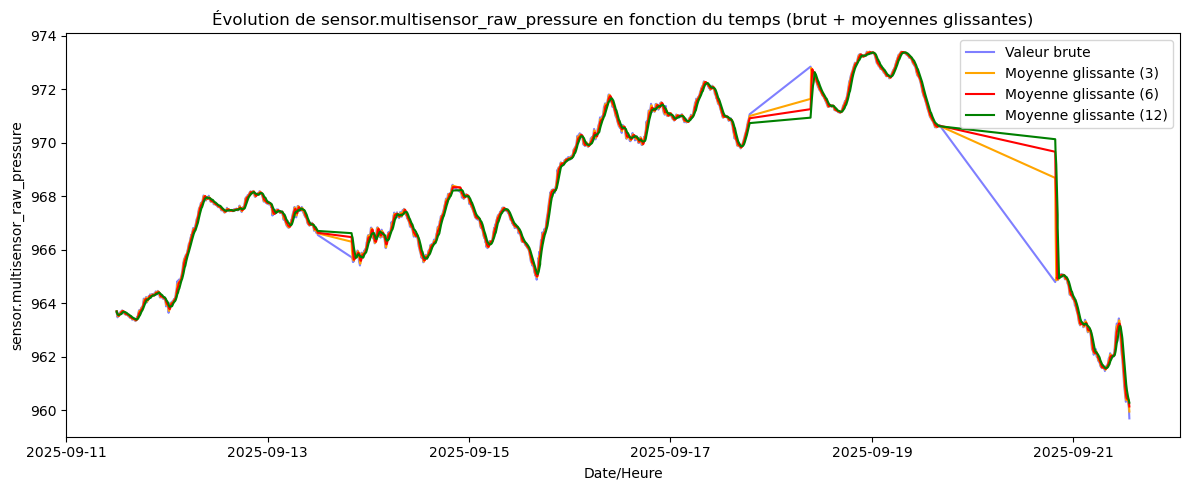

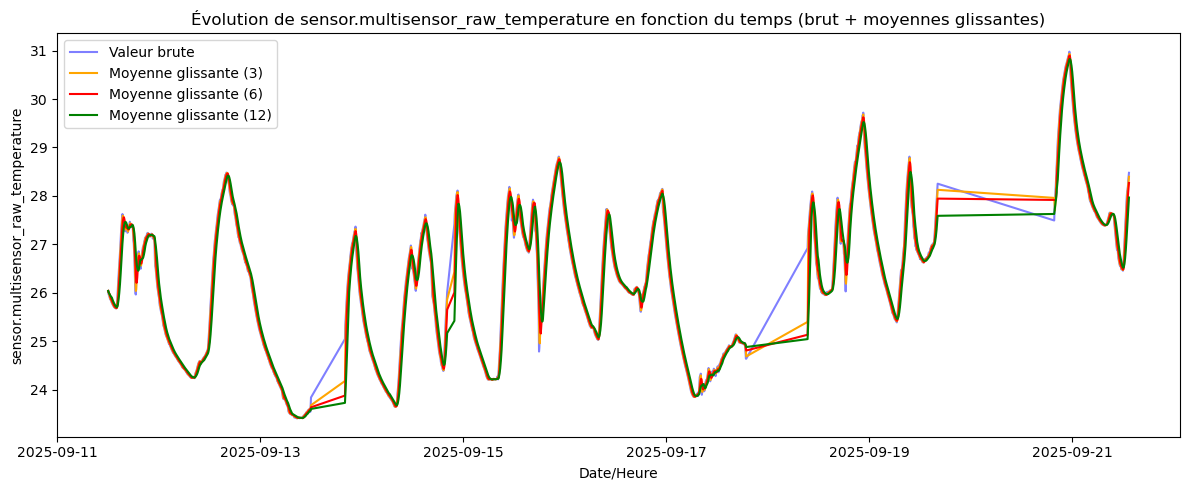

In [203]:
# --- Partie 7 : courbes brutes + moyennes glissantes par grandeur physique (matplotlib) ---
df['last_changed'] = pd.to_datetime(df['last_changed'])
df['state'] = pd.to_numeric(df['state'], errors='coerce')
df_clean = df.dropna(subset=['last_changed', 'state', 'entity_id'])

for entity in df_clean['entity_id'].unique():
    df_plot = df_clean[df_clean['entity_id'] == entity].sort_values('last_changed')
    plt.figure(figsize=(12, 5))
    plt.plot(df_plot['last_changed'], df_plot['state'], label='Valeur brute', color='blue', alpha=0.5)
    plt.plot(df_plot['last_changed'], df_plot['state'].rolling(window=3, min_periods=1).mean(), label='Moyenne glissante (3)', color='orange')
    plt.plot(df_plot['last_changed'], df_plot['state'].rolling(window=6, min_periods=1).mean(), label='Moyenne glissante (6)', color='red')
    plt.plot(df_plot['last_changed'], df_plot['state'].rolling(window=12, min_periods=1).mean(), label='Moyenne glissante (12)', color='green')
    plt.title(f"Évolution de {entity} en fonction du temps (brut + moyennes glissantes)")
    plt.xlabel("Date/Heure")
    plt.ylabel(entity)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [204]:
# --- Stockage des valeurs lissées pour fenêtres 6 et 12 dans un nouveau DataFrame ---
smoothed_list = []

for entity in df_clean['entity_id'].unique():
    df_plot = df_clean[df_clean['entity_id'] == entity].sort_values('last_changed').copy()
    # Calcul des moyennes glissantes pour 6 et 12
    df_plot['smoothed_6'] = df_plot['state'].rolling(window=6, min_periods=1).mean()
    df_plot['smoothed_12'] = df_plot['state'].rolling(window=12, min_periods=1).mean()
    # On ne garde que les colonnes utiles
    temp = df_plot[['last_changed', 'entity_id', 'state', 'smoothed_6', 'smoothed_12']].copy()
    temp = temp.rename(columns={'state': 'raw'})
    smoothed_list.append(temp)

# Concaténation de tous les DataFrames lissés
df_smoothed = pd.concat(smoothed_list, ignore_index=True)
df_smoothed.head()

,last_changed,entity_id,raw,smoothed_6,smoothed_12
0,2025-09-11 12:00:00+00:00,sensor.multisensor_raw_air_quality,322.9990,322.999000,322.999000
1,2025-09-11 12:02:01.074000+00:00,sensor.multisensor_raw_air_quality,323.8163,323.407650,323.407650
2,2025-09-11 12:07:01.080000+00:00,sensor.multisensor_raw_air_quality,323.6122,323.475833,323.475833
3,2025-09-11 12:12:01.086000+00:00,sensor.multisensor_raw_air_quality,322.5888,323.254075,323.254075
4,2025-09-11 12:17:01.109000+00:00,sensor.multisensor_raw_air_quality,322.3827,323.079800,323.079800
